Bitcoin Price Prediction - Group 24


Group Members:
- Eren Kurt (00029393)
- Zeynep Yıldız (00029325)
- Ataberk Asil Karaman (00028945)
- Yusuf Kerim Ciğer (00027832)

##Introduction

Bitcoin is a cryptocurrency and a kind of electronic cash. It is a peer-to-peer digital currency that may be transmitted from peer to peer (p2p) on the Bitcoin network without the involvement of an intermediary. It maintains track of and encrypts all peer-to-peer transactions. While the popularity of bitcoin increases, the price prediction of bitcoin is getting more and more important
over time. The puspose of this prject is the create visualizations of bitcoin prices over years and create a machine learning algorithm to predict close future prices. 

### Problem Definition

We created multiple charts to show the difference of multiple values between the years of Bitcoin.
And also we created charts that show the difference between other coins too so we can see if there was an event that affected all coins and not just Bitcoin.
Our purpose is the show and analyse the differences and anomalies so we can go have an ideology when creating our ML in the later stages of our project.

The order the of this research as follows:

Determine the years (or specific times) when a dramatic change happened to Bitcoin prices

Find the "Player Point" of each star player that we found

Find champions and runner-ups per season (championsdata and runnerupsdata)

Comparing the star players of the champions and the runner-ups per season.

Determine whether the star player of champion team is better than from the star player of runner-up team or not and compare stats of both players

### Utilized Datasets

We have several data sets. 

The first data set that are we going to use is "BTC - USD" which includes the Open	High	Low	Close	Adj Close	Volume of Bitcoin prices of the years 2014-2022. We will use this data set mainly.

First Data Set Link:https://www.kaggle.com/surajjha101/analyzing-and-prediction-of-bitcoin-pricing


The second and the third of the data that we are going to use is the similar data sets for other coins so we can see if any of the drops or rises in bitcoin happened on other coins too.

Other data's link: https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory

In [ ]:
from google.colab import drive
drive.mount('./drive', force_remount=True)

path_prefix = './drive/My Drive'


Mounted at ./drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from os.path import join
%matplotlib inline

In [ ]:
import warnings
warnings.simplefilter('ignore')

In [ ]:
#Reading datasets which are imported Google Drive

first_filename = 'BTC-USD.csv'
second_filename = "coin_Ethereum.csv"
third_filename = "coin_Stellar.csv"
fourth_filename = "coin_Polkadot.csv"

Bitcoin_df = pd.read_csv(join(path_prefix, first_filename))
Ethereum_df = pd.read_csv(join(path_prefix, second_filename))
Stellar_df = pd.read_csv(join(path_prefix, third_filename))
Polkadot_df = pd.read_csv(join(path_prefix, fourth_filename))

In [ ]:
Bitcoin_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2755.000000,2755.000000,2755.000000,2755.000000,2755.000000,2.755000e+03
mean,11768.664114,12082.896368,11425.227294,11783.725409,11783.725409,1.489443e+10
std,16405.233671,16841.443821,15910.212812,16413.271203,16413.271203,1.994140e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,609.777497,612.311005,606.981994,609.804504,609.804504,8.172330e+07
50%,6380.379883,6504.649902,6297.930176,6385.819824,6385.819824,5.262698e+09
75%,10795.780762,11047.681152,10485.476074,10788.915528,10788.915528,2.512467e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [ ]:
Bitcoin_df.shape

(2755, 7)

In [ ]:
Bitcoin_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
Bitcoin_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
# Modifying the datasets for easier use later on. (Now we are changing the date 
# aspect of each data set and we will use it to categorize and comparing)

Bitcoin_df['Date'] = pd.to_datetime(Bitcoin_df['Date'])
Ethereum_df['Date'] = pd.to_datetime(Ethereum_df['Date'])
Stellar_df['Date'] = pd.to_datetime(Stellar_df['Date'])

Bitcoin_df['YEAR'] = pd.DatetimeIndex(Bitcoin_df['Date']).year # taken from https://www.codegrepper.com/code-examples/python/extract+year+from+date+in+python
Ethereum_df['YEAR'] = pd.DatetimeIndex(Ethereum_df['Date']).year
Stellar_df['YEAR'] = pd.DatetimeIndex(Stellar_df['Date']).year

Bitcoin_df['MONTH'] = pd.DatetimeIndex(Bitcoin_df['Date']).month

# trimming datasets so we will have after 2015 and forward. 
# (Aim: Having same timeline for all of them)
Bitcoin_df = Bitcoin_df[Bitcoin_df["YEAR"] >= 2015]
Ethereum_df = Ethereum_df[Ethereum_df["YEAR"] >= 2015]
Stellar_df = Stellar_df[Stellar_df["YEAR"] >= 2015]

In [ ]:
#first 4 rows of Bitcoin dataframe
Bitcoin_df.head(4)

,Date,Open,High,Low,Close,Adj Close,Volume,YEAR,MONTH
106,2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550,2015,1
107,2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650,2015,1
108,2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400,2015,1
109,2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100,2015,1


In [ ]:
#last 4 rows of Bitcoin dataframe
Bitcoin_df.tail(4)

,Date,Open,High,Low,Close,Adj Close,Volume,YEAR,MONTH
2751,2022-03-30,47456.898438,47655.148438,46746.210938,47062.664063,47062.664063,29333883962,2022,3
2752,2022-03-31,47062.148438,47512.027344,45390.539063,45538.675781,45538.675781,33327427106,2022,3
2753,2022-04-01,45554.164063,46616.242188,44403.140625,46281.644531,46281.644531,38162644287,2022,4
2754,2022-04-02,46168.101563,47003.429688,46157.980469,46508.101563,46508.101563,35441143808,2022,4


In [ ]:
# Check if there is any NULL data
Bitcoin_df.isnull().values.any() 

False

In [ ]:
Bitcoin_df.isna().sum() / Bitcoin_df.shape[0]

Date         0.0
Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
YEAR         0.0
MONTH        0.0
dtype: float64

In [ ]:
#shuffling dataframes
#Bitcoin_df = Bitcoin_df.sample(frac = 1)
#Ethereum_df = Ethereum_df.sample(frac = 1)
#Stellar_df = Stellar_df.sample(frac = 1)
#Polkadot_df = Polkadot_df.sample(frac = 1)

In [ ]:
# The code below shows the first 4 row of the data after shuffling
Bitcoin_df.head(4)

,Date,Open,High,Low,Close,Adj Close,Volume,YEAR,MONTH
106,2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550,2015,1
107,2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650,2015,1
108,2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400,2015,1
109,2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100,2015,1


In [ ]:
# The code below shows the last 4 row of the data after shuffling
Bitcoin_df.tail(4)

,Date,Open,High,Low,Close,Adj Close,Volume,YEAR,MONTH
2751,2022-03-30,47456.898438,47655.148438,46746.210938,47062.664063,47062.664063,29333883962,2022,3
2752,2022-03-31,47062.148438,47512.027344,45390.539063,45538.675781,45538.675781,33327427106,2022,3
2753,2022-04-01,45554.164063,46616.242188,44403.140625,46281.644531,46281.644531,38162644287,2022,4
2754,2022-04-02,46168.101563,47003.429688,46157.980469,46508.101563,46508.101563,35441143808,2022,4


(0.0, 49511834028.01315)

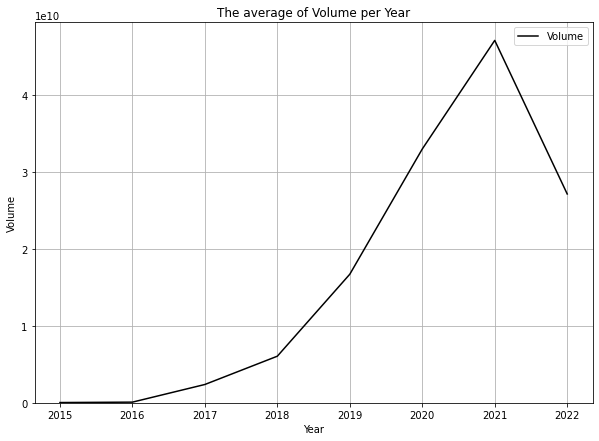

In [ ]:
plt.rcParams["figure.figsize"] = (10,7)
graph = Bitcoin_df.groupby(by='YEAR').mean()['Volume'].plot(color='black', legend=True)

graph.set_xlabel('Year')
graph.set_ylabel('Volume')
graph.grid(axis='x')
graph.grid(axis='y')
graph.set_title('The average of Volume per Year')

plt.ylim(0e9)
#average volume of each year can give us an idea of how much interest people 
#have in Bitcoin and so we can have an idea for future interest

[]

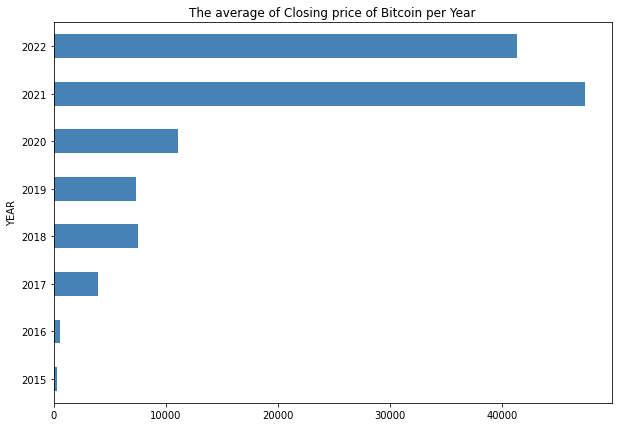

In [ ]:
plt.rcParams["figure.figsize"] = (10,7)
ax = Bitcoin_df.groupby(by='YEAR').mean()['Close'].plot(kind='barh', color='steelblue')
ax.set_title('The average of Closing price of Bitcoin per Year')
ax.plot()

(0.0, 13507.800748699998)

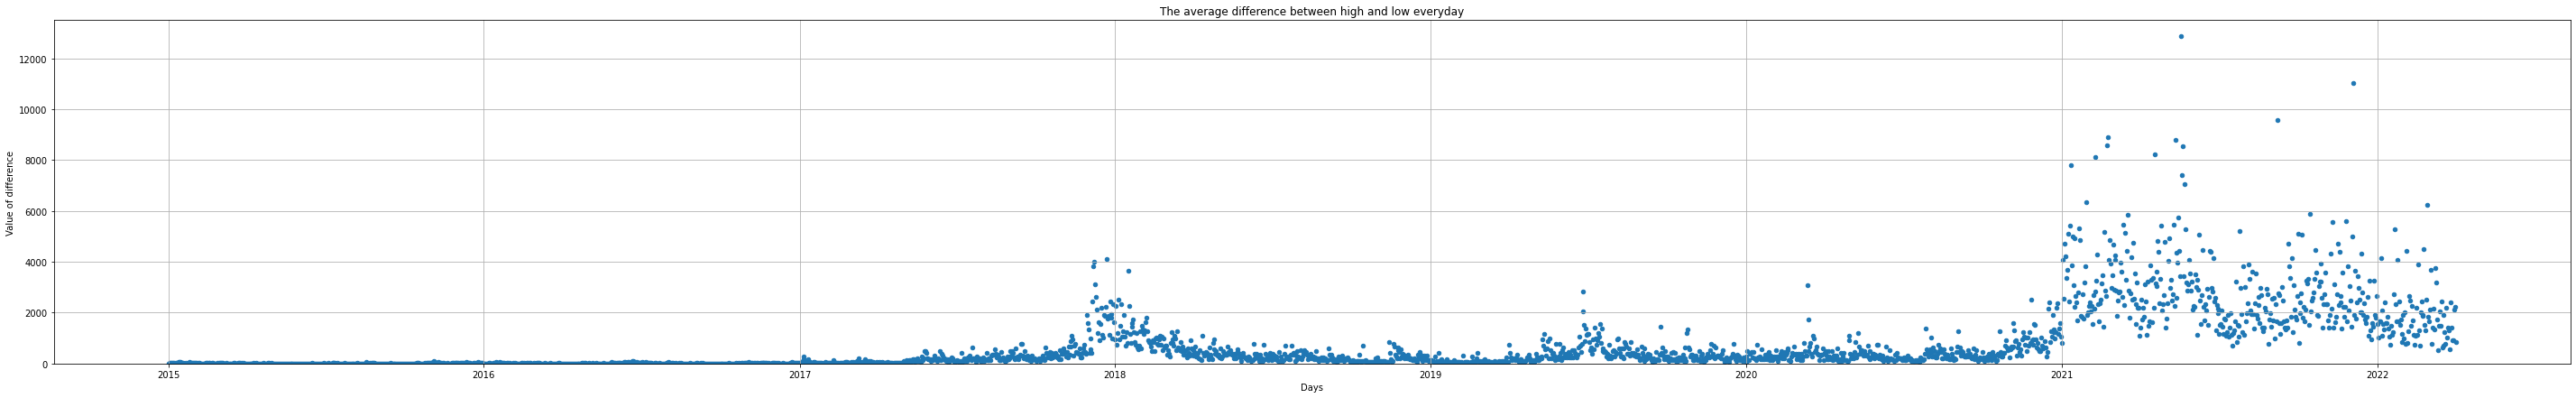

In [ ]:
def get_diff(row):
    """
    a student can only graduate if gpa >= 2.0 and class == senior
    """
    high = row["High"]
    low = row["Low"]
    diff = high - low
    
    return diff

Bitcoin_df["diff"] = Bitcoin_df.apply(get_diff, axis=1)  # with axis=1, we iterate over rows

#graph = plt.scatter(Bitcoin_df["Date"], Bitcoin_df["diff"], color='black', legend=True)
plt.rcParams["figure.figsize"] = (50,7)
graph = Bitcoin_df.plot(kind='scatter',x='Date',y='diff')

graph.set_xlabel('Days')
graph.set_ylabel('Value of difference')
graph.grid(axis='x')
graph.grid(axis='y')
graph.set_title('The average difference between high and low everyday')

plt.ylim(0e9)

The above graph shows how the difference of the highest price and lowest price in day. And we can see here that the most changes happened at the start of 2018 and after the start of 2021. 
This maybe caused by the bitcoin itself or some outside effect (which affected other coins too so we should look at other coins too)

(0.0, 0.5026258939992554)

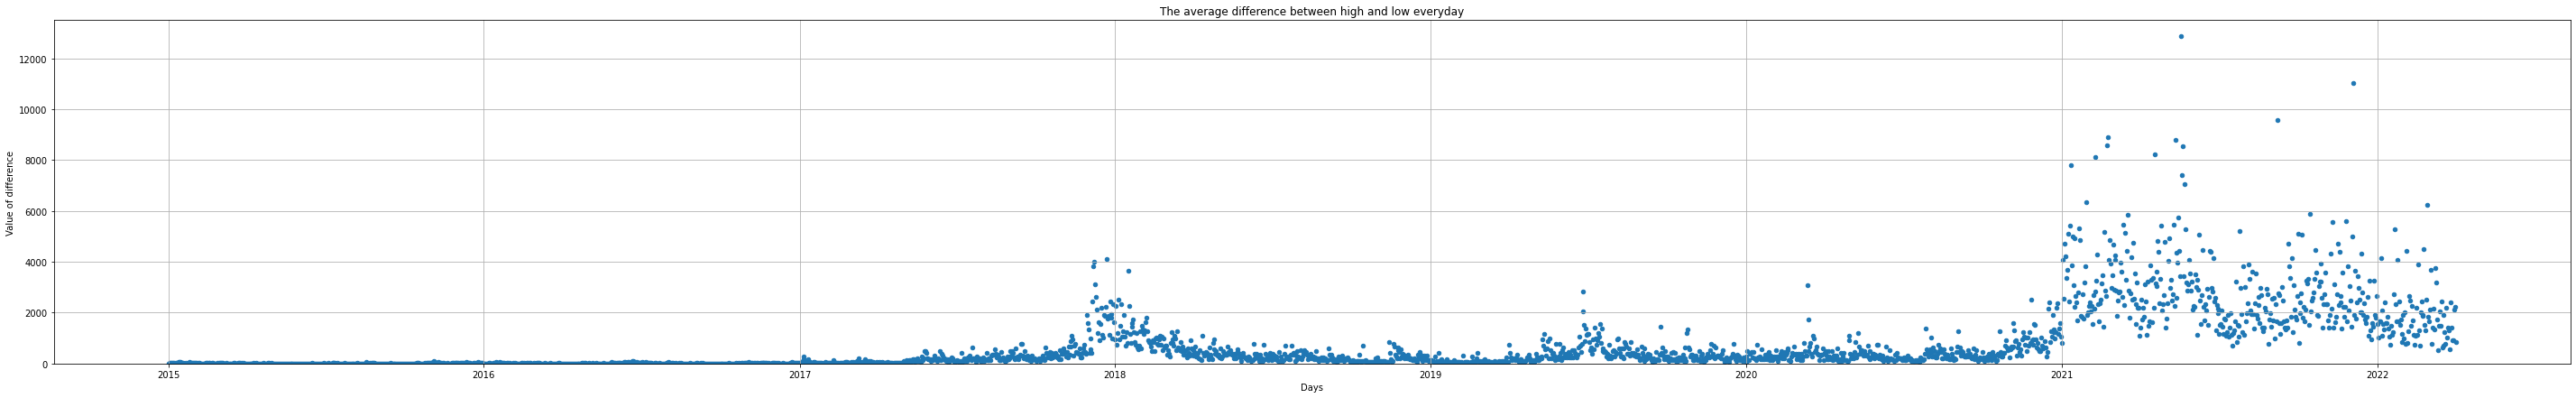

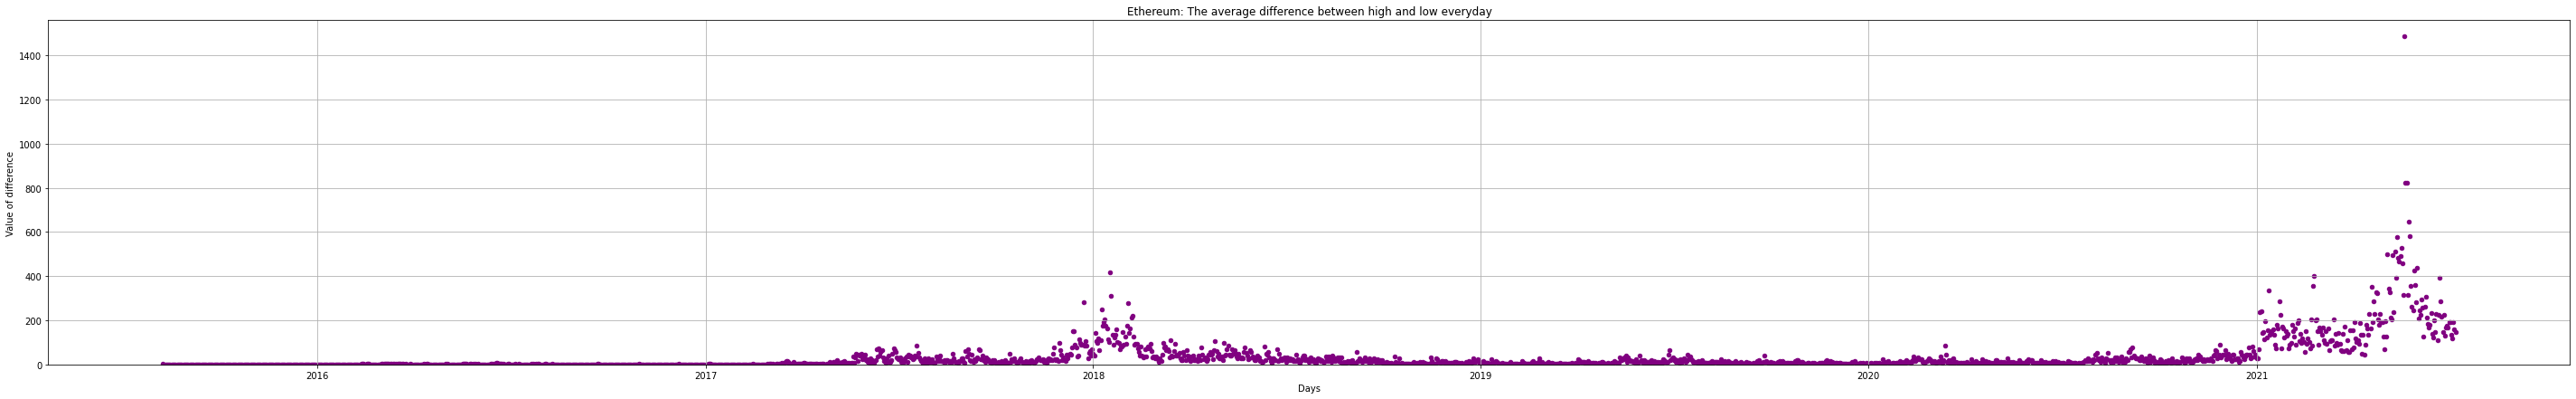

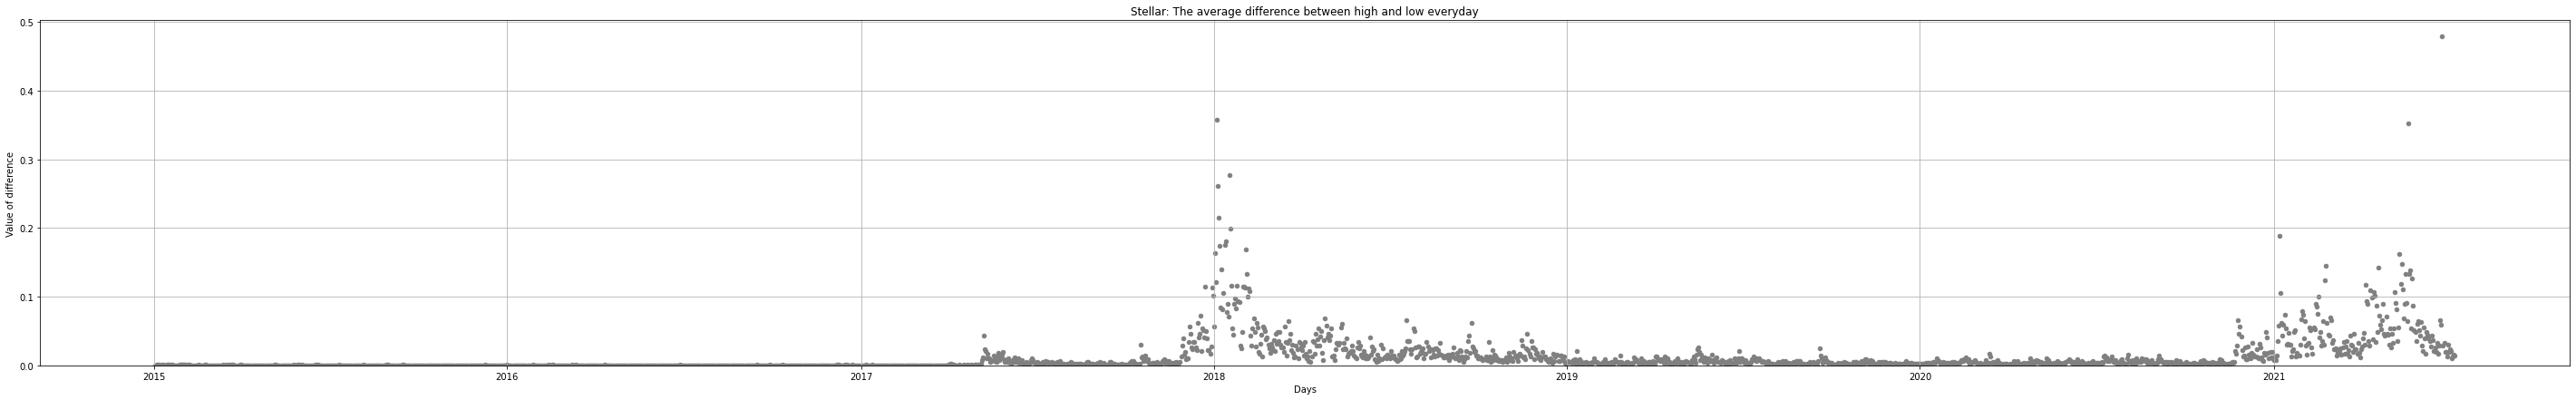

In [ ]:
Bitcoin_df["diff"] = Bitcoin_df.apply(get_diff, axis=1)  # with axis=1, we iterate over rows

#graph = plt.scatter(Bitcoin_df["Date"], Bitcoin_df["diff"], color='black', legend=True)
plt.rcParams["figure.figsize"] = (50,7)
graph = Bitcoin_df.plot(kind='scatter',x='Date',y='diff')

graph.set_xlabel('Days')
graph.set_ylabel('Value of difference')
graph.grid(axis='x')
graph.grid(axis='y')
graph.set_title('The average difference between high and low everyday')

plt.ylim(0e9)

Ethereum_df["diff"] = Ethereum_df.apply(get_diff, axis=1)  # with axis=1, we iterate over rows

#graph = plt.scatter(Ethereum_df["Date"], Ethereum_df["diff"], color='black', legend=True)
plt.rcParams["figure.figsize"] = (50,7)
graph = Ethereum_df.plot(kind='scatter',x='Date',y='diff', color="purple")

graph.set_xlabel('Days')
graph.set_ylabel('Value of difference')
graph.grid(axis='x')
graph.grid(axis='y')
graph.set_title('Ethereum: The average difference between high and low everyday')

plt.ylim(0e9)

Stellar_df["diff"] = Stellar_df.apply(get_diff, axis=1)  # with axis=1, we iterate over rows

#graph = plt.scatter(Stellar_df["Date"], Stellar_df["diff"], color='black', legend=True)
plt.rcParams["figure.figsize"] = (50,7)
graph = Stellar_df.plot(kind='scatter',x='Date',y='diff', color="grey")

graph.set_xlabel('Days')
graph.set_ylabel('Value of difference')
graph.grid(axis='x')
graph.grid(axis='y')
graph.set_title('Stellar: The average difference between high and low everyday')

plt.ylim(0e9)

So it looks like other coins got effected too. Polkadot, Stellar and Bitcoin show similar behaviors. So we will look at events that might have caused this much of rise in in the price of coins.

Text(0.5, 1.0, 'Stellar: Volume change over time')

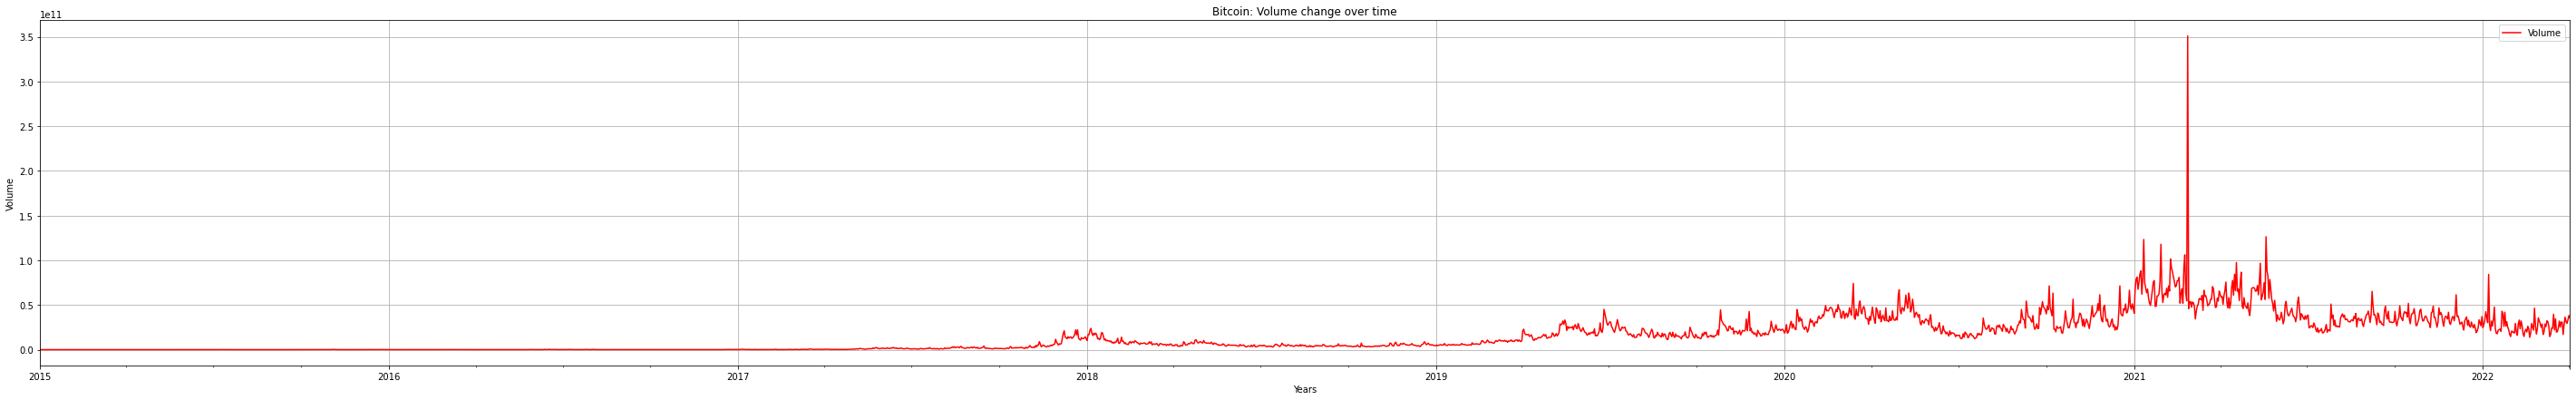

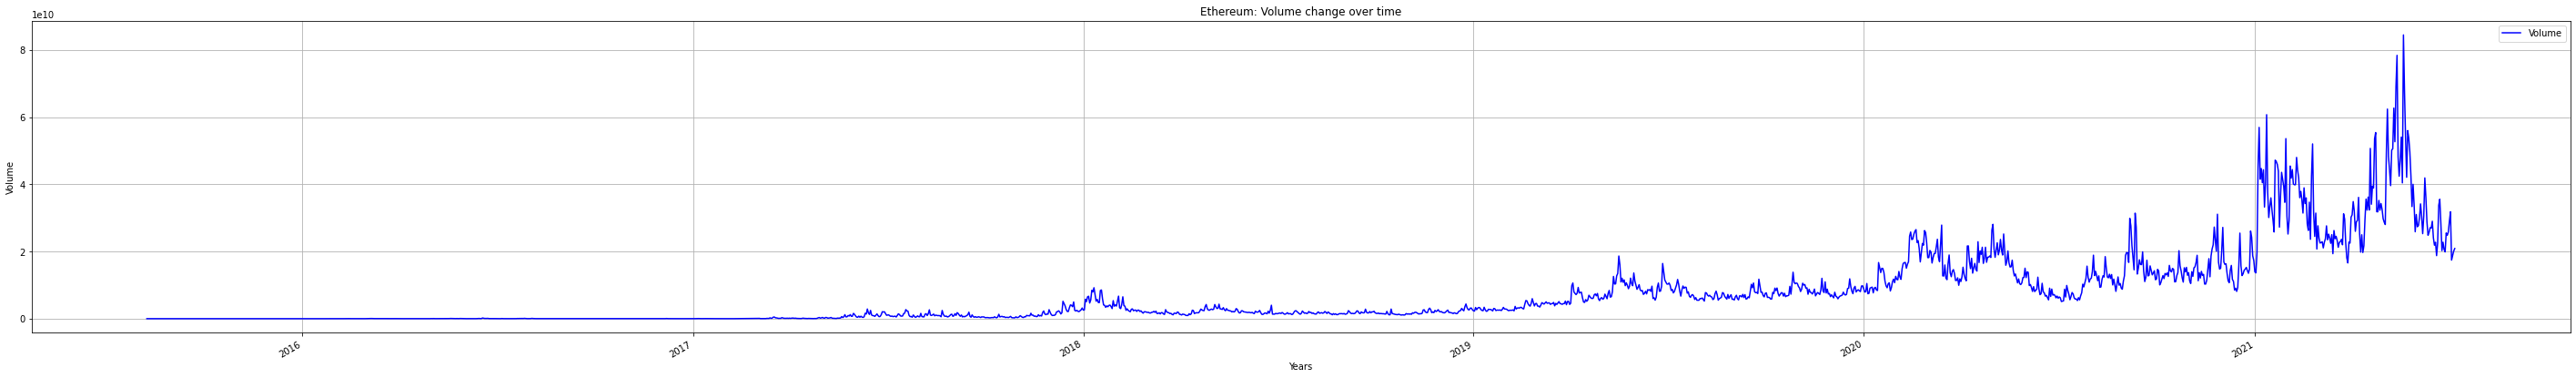

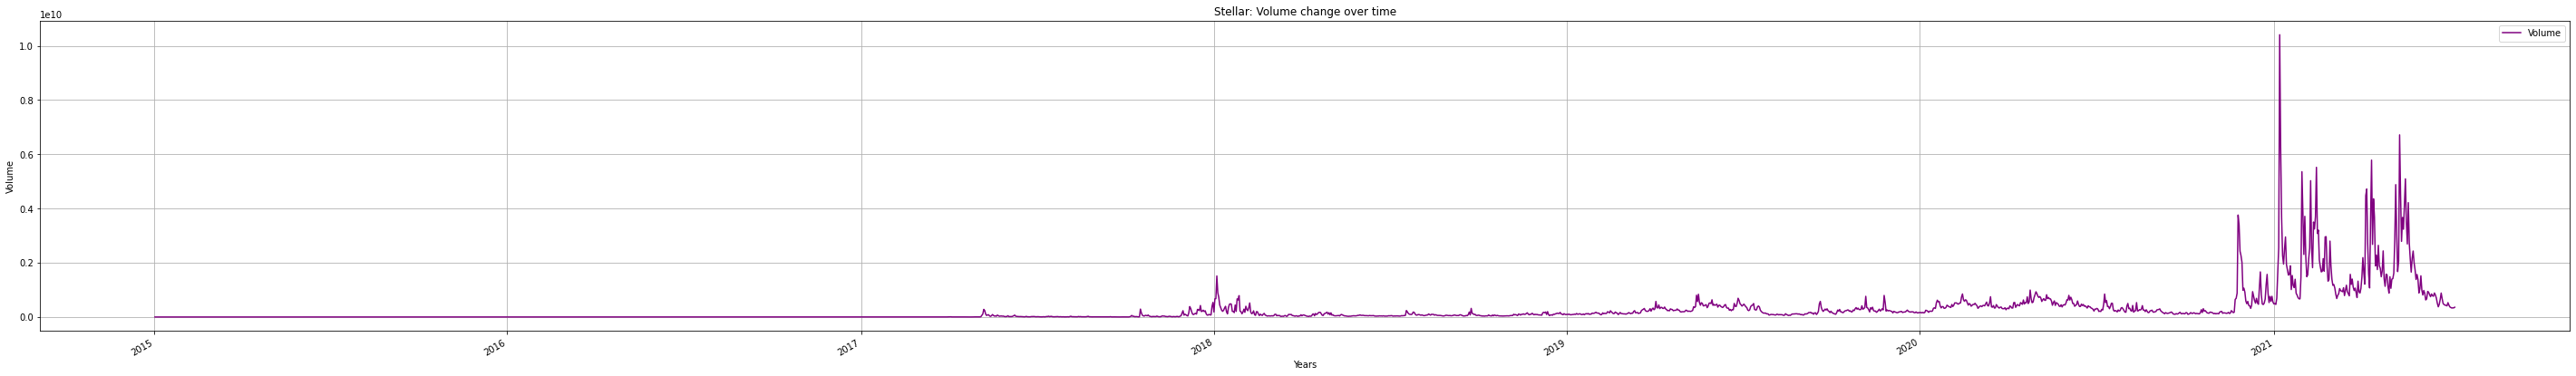

In [ ]:
#volume change for every coin to compare

graph = Bitcoin_df.plot(x="Date",y="Volume", color="red")
graph.set_xlabel('Years')
graph.set_ylabel('Volume')
graph.grid(axis='x')
graph.grid(axis='y')
graph.set_title('Bitcoin: Volume change over time')

graph2= Ethereum_df.plot(x="Date",y="Volume", color="blue")
graph2.set_xlabel('Years')
graph2.set_ylabel('Volume')
graph2.grid(axis='x')
graph2.grid(axis='y')
graph2.set_title('Ethereum: Volume change over time')

graph3 = Stellar_df.plot(x="Date",y="Volume", color="purple")
graph3.set_xlabel('Years')
graph3.set_ylabel('Volume')
graph3.grid(axis='x')
graph3.grid(axis='y')
graph3.set_title('Stellar: Volume change over time')

What we can gather from these graphs is that in 2018 and 2021 there has been a big demand for coins. So this will result in a rise up in price.

In [ ]:
#This function below will return any difference, the maximum and minimum value of a column depends on its year
def DiffperYear(dataset):
  max_of_year = dataset.groupby('YEAR').max()
  min_of_year = dataset.groupby('YEAR').min()
  return (max_of_year - min_of_year), max_of_year, min_of_year


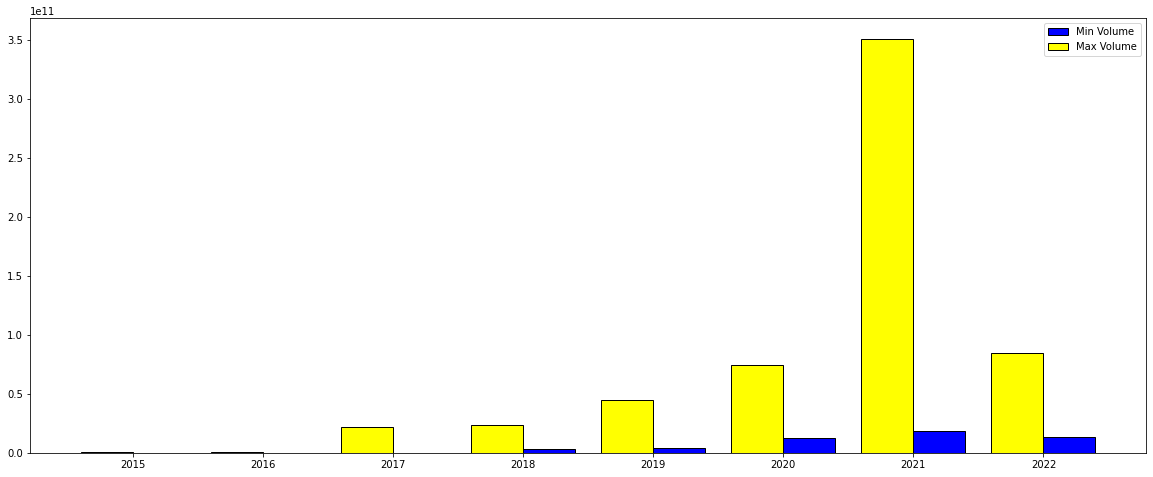

In [ ]:
volume_year = Bitcoin_df[ ['YEAR', 'Volume'] ]
volume_year
volume_year_diff, volume_year_max, volume_year_min = DiffperYear(volume_year)

volume_year_max = volume_year_max.values.tolist()
volume_year_max_list = [ volume_year_max[i][0] for i in range(len(volume_year_max))] 

volume_year_min = volume_year_min.values.tolist()
volume_year_min_list = [ volume_year_min[i][0] for i in range(len(volume_year_min))]

length = len(volume_year_max_list)
bin = np.arange(length)
w = 0.4

unique_list = Bitcoin_df['YEAR'].unique().tolist()
unique_list.sort() #we need this operation because of shuffling the years are not in a correct way

plt.figure(figsize=(20,8))
plt.bar(bin + w, volume_year_min_list, color='blue', width=w, edgecolor='black', label='Min Volume')
plt.bar(bin, volume_year_max_list, color='yellow', width=w, edgecolor='black', label='Max Volume')
plt.xticks(bin + w/2,unique_list)
plt.legend()
plt.show()


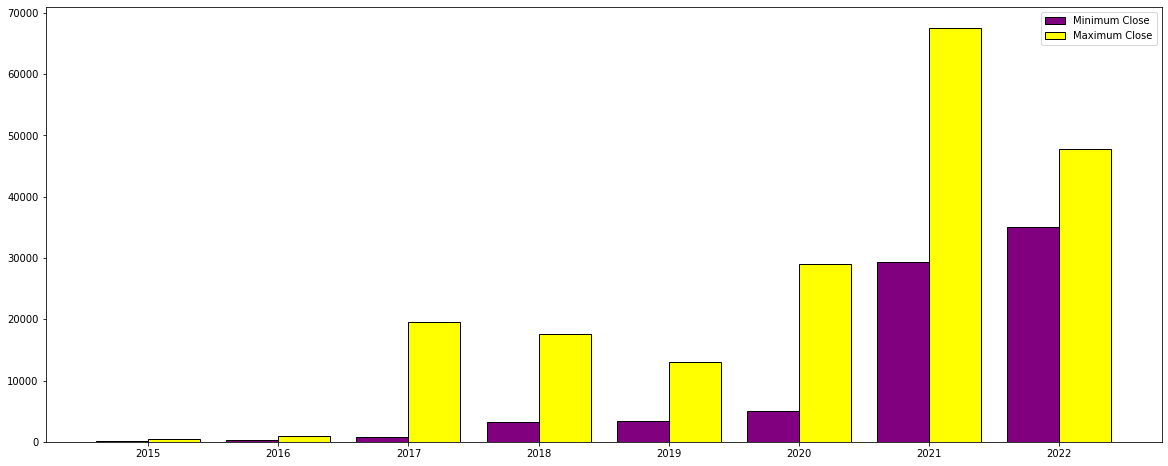

[465.321014,
 975.921021,
 19497.400391,
 17527.0,
 13016.231445,
 29001.720703,
 67566.828125,
 47686.8125]

In [ ]:
cy = Bitcoin_df[ ['YEAR', 'Close'] ]
cyd, cymx, cymn = DiffperYear(cy)
cymx = cymx.values.tolist()
cymx_list = [cymx[i][0] for i in range(len(cymx))]

cymn = cymn.values.tolist()
cymn_list = [cymn[i][0] for i in range(len(cymn))]

listlen = len(cymn_list)
bin = np.arange(listlen)
width = 0.4

unique_list = Bitcoin_df['YEAR'].unique().tolist()
unique_list.sort()

plt.figure(figsize=(20,8))
plt.bar(bin, cymn_list, color='purple', width=width, edgecolor='black', label='Minimum Close')
plt.bar(bin + width, cymx_list, color='yellow', width=width, edgecolor='black', label='Maximum Close')
plt.xticks(bin + width/2, unique_list)
plt.legend()
plt.show()

cymx_list

Just like the chart above, in this bar chart it is clearly shown that the movement in BTC market increased with the growing popularity of kriptocurrency. However, this bar chart also visualizes the increasing popularity caused the differernces between maximum and minimum closing values. From this we can conclude that market started to get less stabilized.


In [ ]:
def DiffperYearGraph(dataset, color1, color2, labelname1, labelname2):
  max_of_year = dataset.groupby('YEAR').max()
  min_of_year = dataset.groupby('YEAR').min()

  max_of_year = max_of_year.values.tolist()
  max_of_year_list = [max_of_year[i][0] for i in range(len(max_of_year))]

  min_of_year = min_of_year.values.tolist()
  min_of_year_list = [min_of_year[i][0] for i in range(len(min_of_year))]

  len_of_list = len(min_of_year_list)
  bin = np.arange(len_of_list)
  width = 0.4

  unique_list = Bitcoin_df['YEAR'].unique().tolist()
  unique_list.sort()

  plt.figure(figsize=(20,8))
  plt.bar(bin, min_of_year_list, color=color1, width=width, edgecolor='black', label=labelname1)
  plt.bar(bin + width, max_of_year_list, color=color2, width=width, edgecolor='black', label=labelname2)
  plt.xticks(bin + width/2, unique_list)
  plt.legend()
  plt.show()

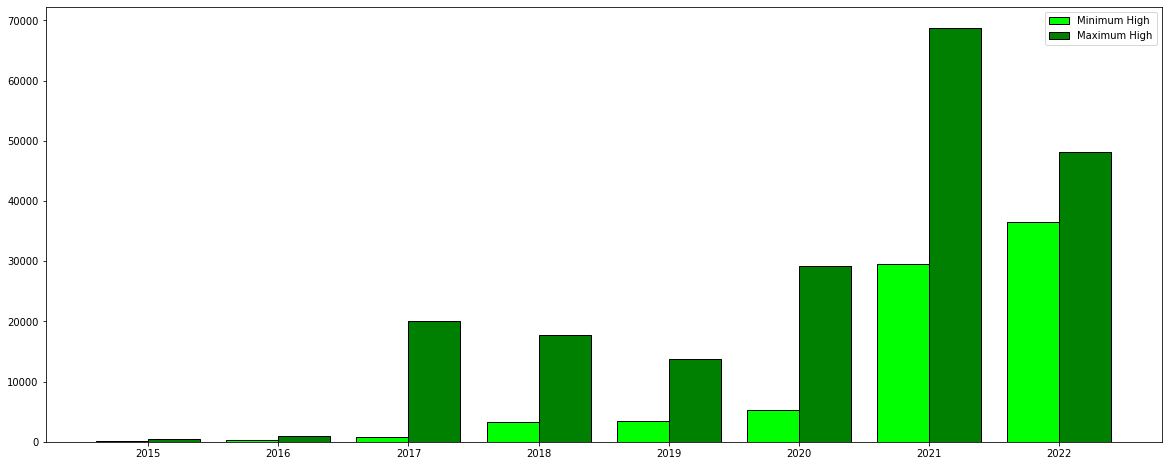

In [ ]:
dataset_year_high = Bitcoin_df[['YEAR', 'High']]
DiffperYearGraph(dataset_year_high, 'lime', 'green', 'Minimum High', 'Maximum High')

#datay = list(Bitcoin_df[ ['YEAR', 'High'] ].values)
#datay


With this 'highest value' chart, we can see that this figure is so similar with the 'closing value' chart. From which we can conclude that when the market is more dynamic the differences between maximum and minimum values tend to be greater.

## Future Work
Firstly, we are going to organize our data more so we can compare more data while being more efficient. Then we are going to go on with creating Machine Learning model. After doing our best to create a good ML model we will check every part again and write a conclusion.  


## Future Work Division

Zeynep Yıldız: Implementing the Introduction part, determining problem, utilizing the data for Data Exploration and searching about ML Algoritms.

Ataberk Asil Karaman: Determining problem and utilizing the data for Data Exploration

Eren Kurt: Searching about Machine Learning Algorithms and trying them

Yusuf Kerim Ciğer: Coding part of the Data Exploration and ML

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------




# **Statistical Testing and Hypothesis**

In [ ]:
#Importing libraries for Machine Learning and Statistical Analysis

from scipy import stats
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns


**Correlations**

In [ ]:
def heatCorrel(mainDataset, columnToShift, shiftNo, columnToLook):
  data = mainDataset.copy() # Copying the data
  """
  In this case, since I want to compare if the previous days of closing have an effect of the next day opening price, the shiftNo is 1.
  """
  data[ columnToShift ] = data[ columnToShift ].shift(shiftNo) # User will enter the shiftNo

  data = data.dropna()

  shifted = data[ columnToShift ]
  look = data[ columnToLook ]

  correl = data[[columnToShift, columnToLook ]].corr()

  plt.subplots(figsize=(10, 10))
  sns.heatmap( correl , annot=True, vmin = -0.25, vmax = 1.0, fmt = ".2f")

  return correl

The following is a general heatmap for showing all correlations. The following heatmaps show some correlations between spesific values.

               Open      High       Low     Close  Adj Close    Volume  \
Open       1.000000  0.999516  0.999103  0.998811   0.998811  0.718615   
High       0.999516  1.000000  0.999032  0.999487   0.999487  0.722419   
Low        0.999103  0.999032  1.000000  0.999379   0.999379  0.710729   
Close      0.998811  0.999487  0.999379  1.000000   1.000000  0.717599   
Adj Close  0.998811  0.999487  0.999379  1.000000   1.000000  0.717599   
Volume     0.718615  0.722419  0.710729  0.717599   0.717599  1.000000   
YEAR       0.774539  0.774164  0.775494  0.774902   0.774902  0.763267   
MONTH     -0.000270 -0.001486  0.002191 -0.000158  -0.000158 -0.090757   
diff       0.796284  0.804166  0.777241  0.792134   0.792134  0.729468   

               YEAR     MONTH      diff  
Open       0.774539 -0.000270  0.796284  
High       0.774164 -0.001486  0.804166  
Low        0.775494  0.002191  0.777241  
Close      0.774902 -0.000158  0.792134  
Adj Close  0.774902 -0.000158  0.792134  
Volume 

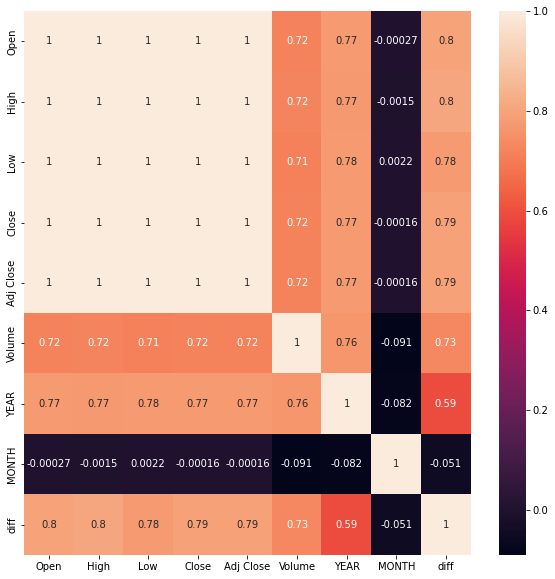

In [ ]:
c = Bitcoin_df.corr()
print(c)
plt.subplots(figsize=(10,10))
sns.heatmap(c, annot=True)

In the following code we can see that the correlation between Close and Open prices is very strong. Which gives the idea of using them for the ML part. But the following heatmap is not showing any information since these values are so close to each other we can't really see the difference.

The Heatmap of the correlation between CLOSE and OPEN:
          Close      Open
Close  1.000000  0.999994
Open   0.999994  1.000000


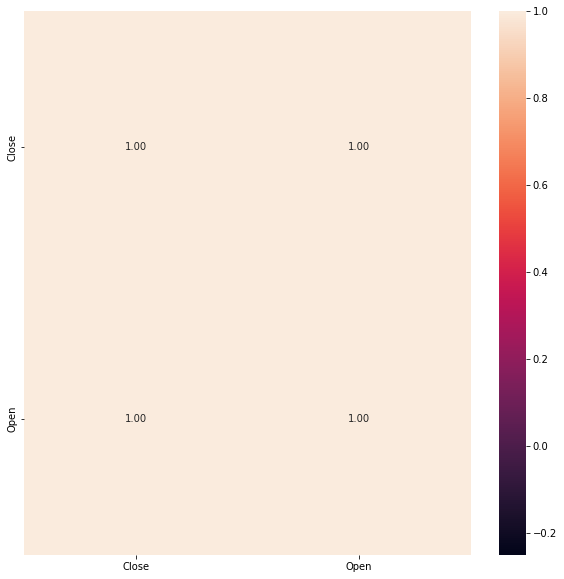

In [ ]:
data = Bitcoin_df.copy()

print(f"The Heatmap of the correlation between CLOSE and OPEN:\n{heatCorrel(data, 'Close', 1, 'Open')}")
# The correlation for Close and Open 

About the previously said problem: What we found from our search on the internet is that the Close and Open prices are very close to each other since the Cryptography Market does not close, these do not have much of a difference. Meaning that it is kind of unreasonable to rely on the correlation between these prices.

So we looked at other pairs in the data. Like Volume and Open

The Heatmap of the correlation between VOLUME and OPEN:
          Volume      Open
Volume  1.000000  0.717466
Open    0.717466  1.000000


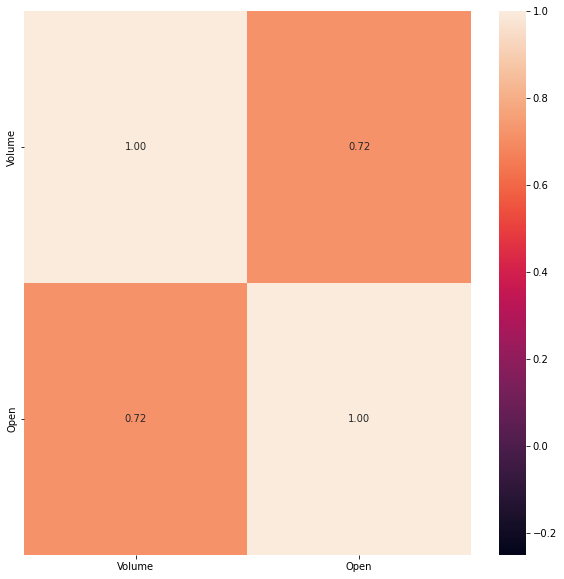

In [ ]:
data2 = Bitcoin_df.copy()

print(f"The Heatmap of the correlation between VOLUME and OPEN:\n{heatCorrel(data2, 'Volume', 1, 'Open')}")

The following two table is to see the difference between the 

In [ ]:
def graphPerMonth(dataset, month, year, compared):
  if month == 1 and year == 0:
    sns.barplot('MONTH', compared, hue='YEAR', data=dataset)

  elif month == 0 and year == 1:
    sns.barplot('YEAR', compared, hue='MONTH', data=dataset)

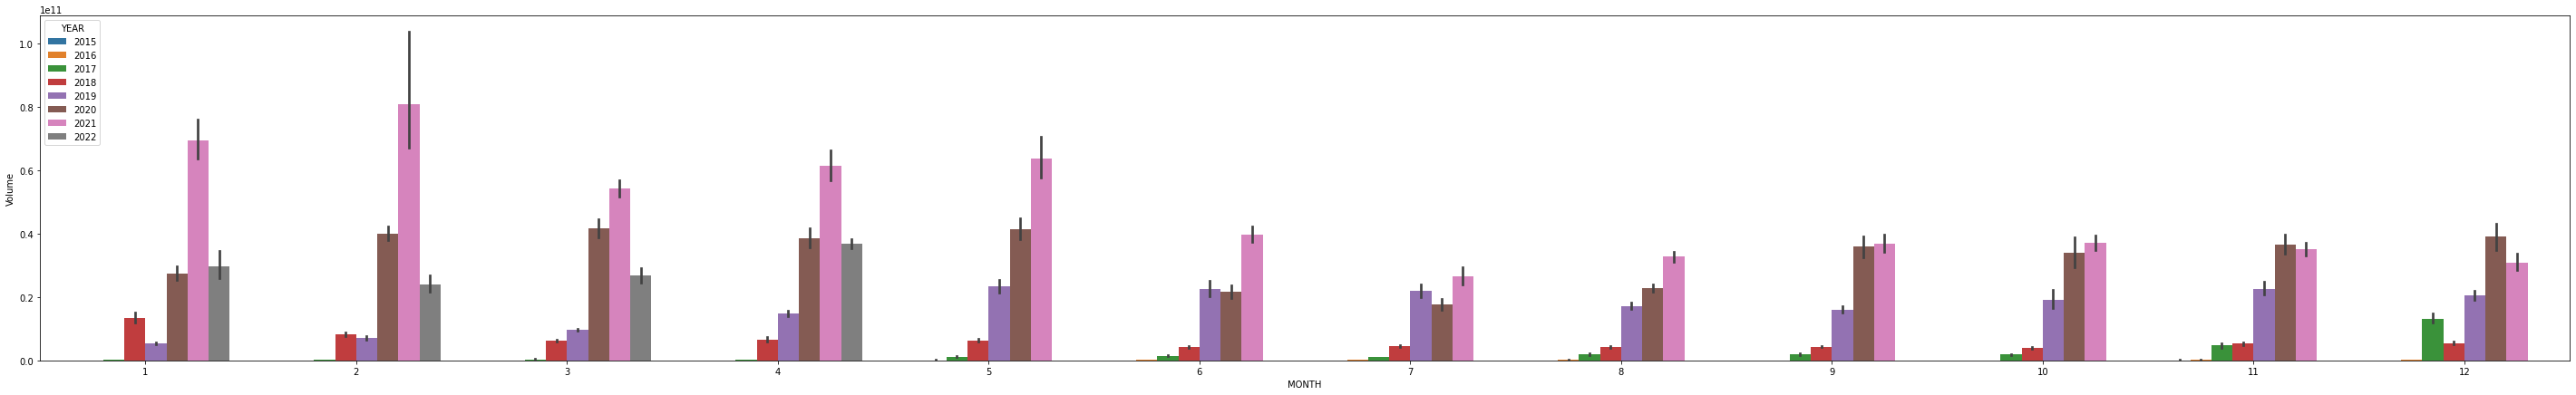

In [ ]:
graphPerMonth(Bitcoin_df, 1, 0, 'Volume')

Again, we are showing how close the open, close, high/low prices.

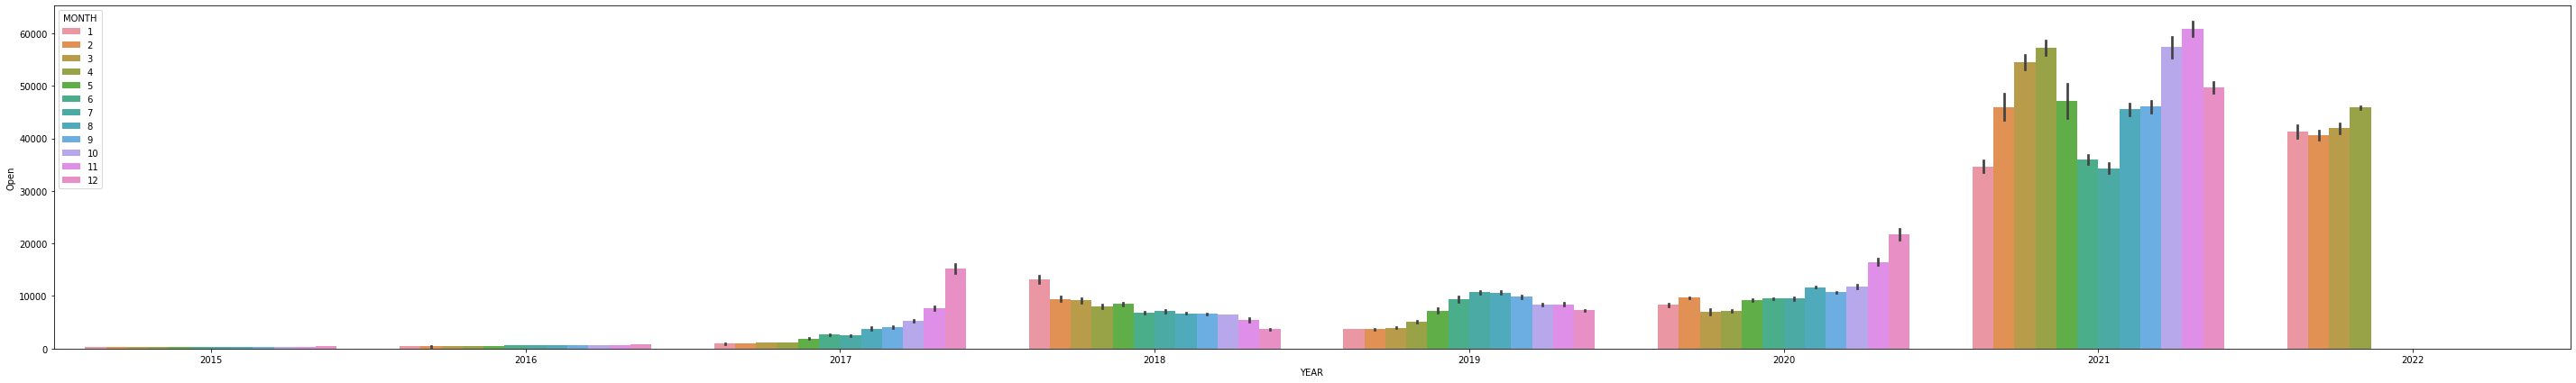

In [ ]:
graphPerMonth(Bitcoin_df, 0, 1, 'Open')

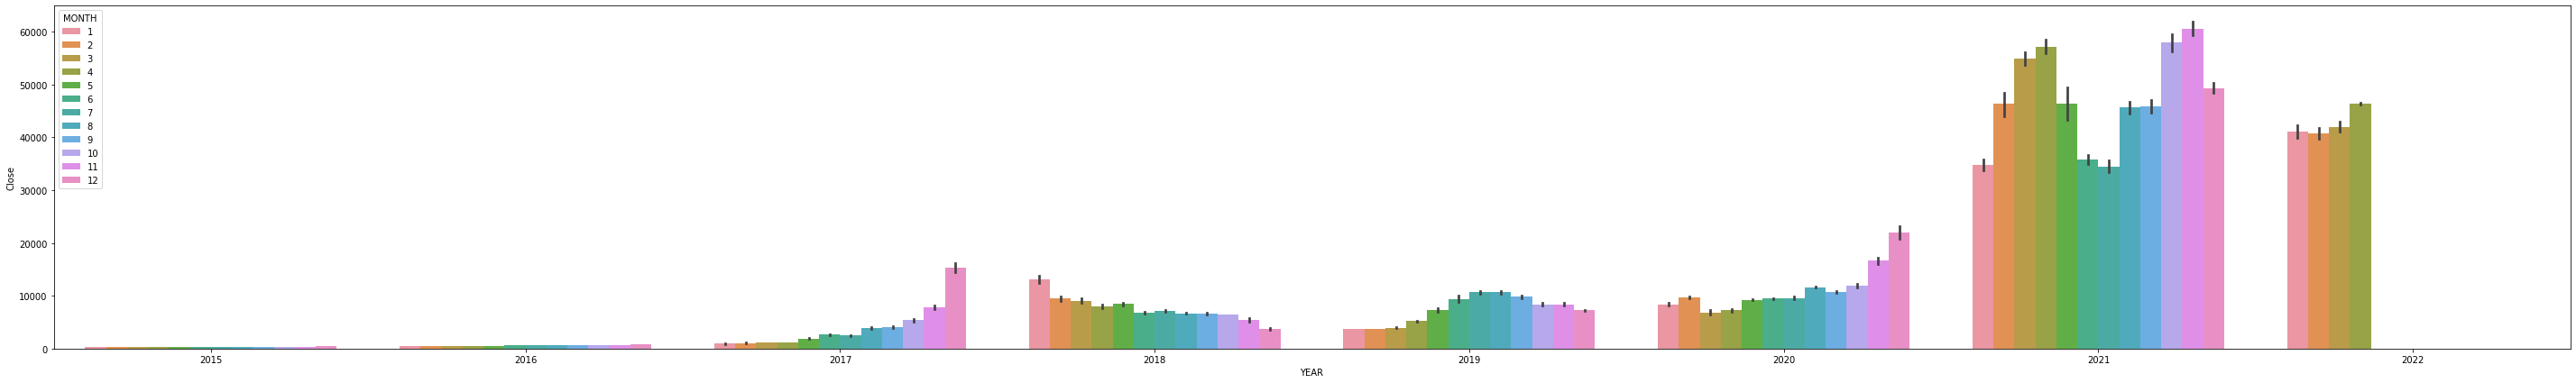

In [ ]:
graphPerMonth(Bitcoin_df, 0, 1, 'Close')

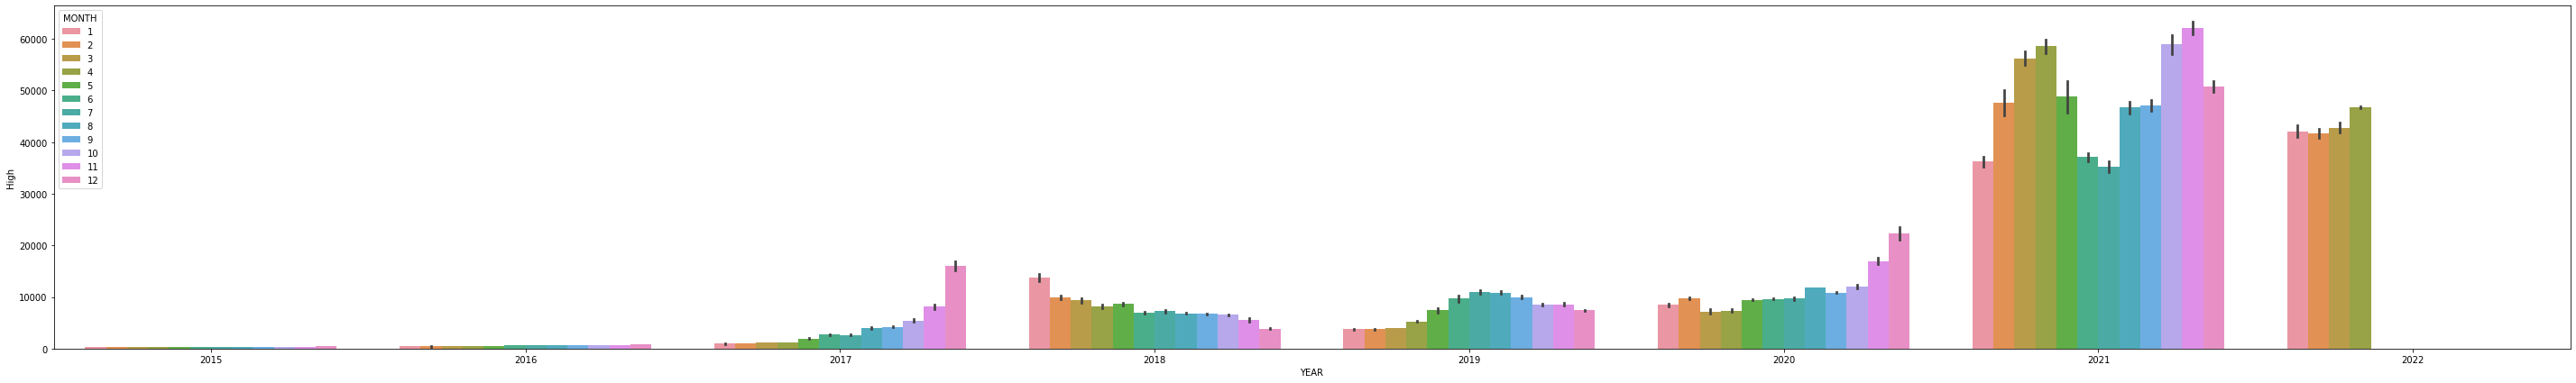

In [ ]:
graphPerMonth(Bitcoin_df, 0, 1, 'High')

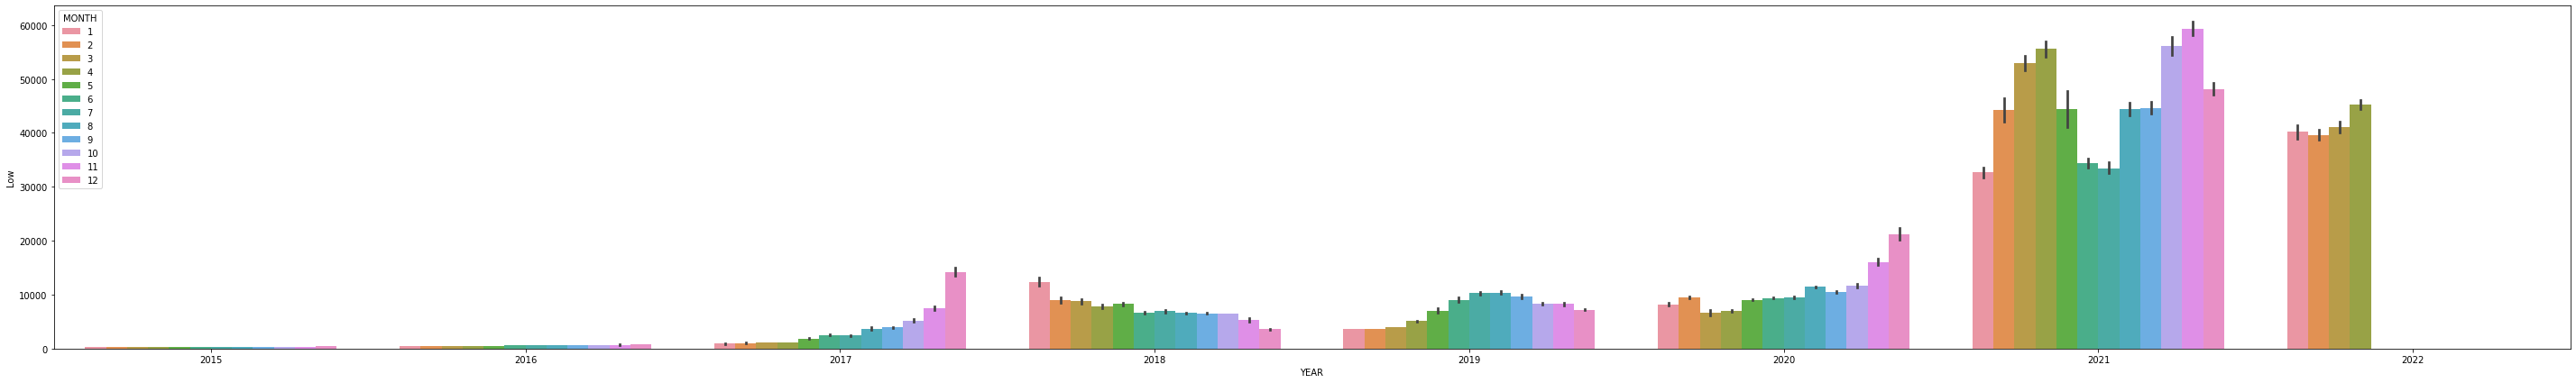

In [ ]:
graphPerMonth(Bitcoin_df, 0, 1, 'Low')

And this is why we are looking at the differrences and volume. 

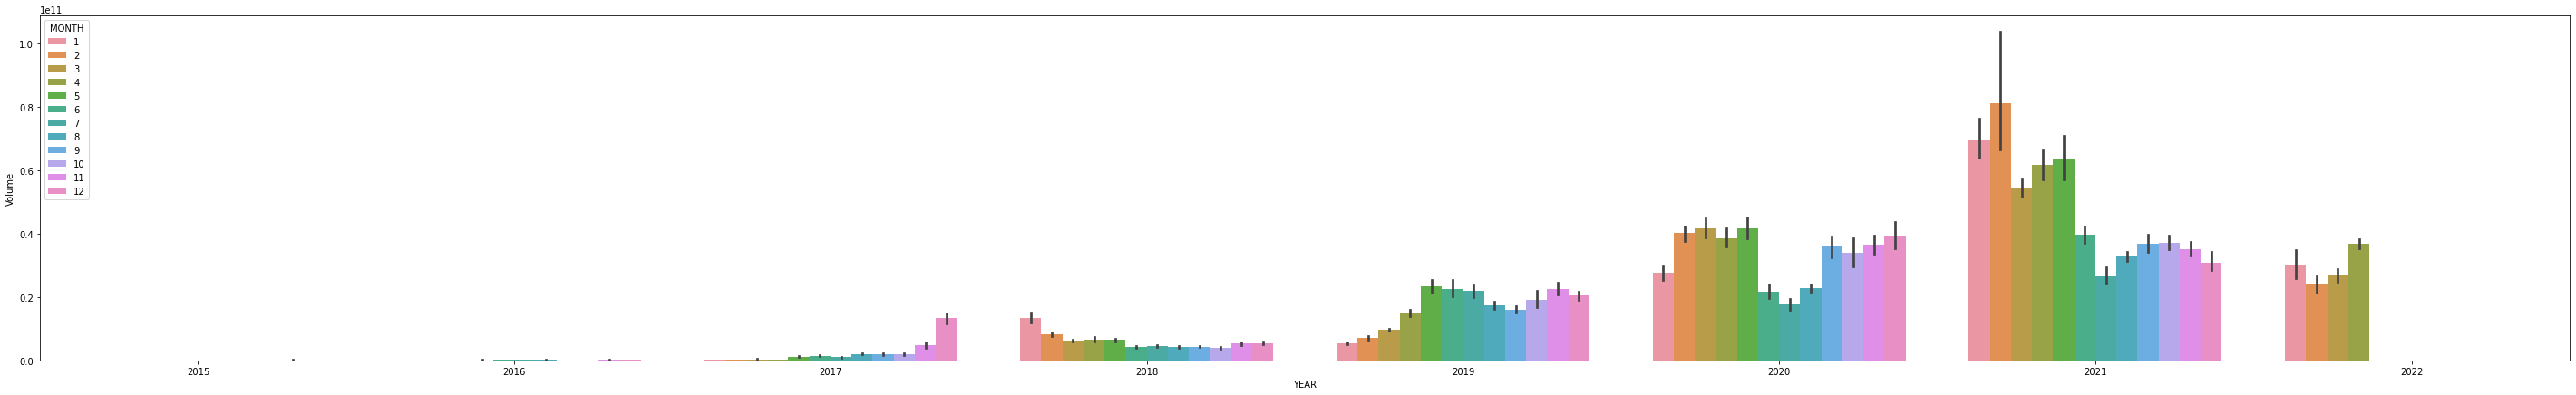

In [ ]:
graphPerMonth(Bitcoin_df, 0, 1, 'Volume')

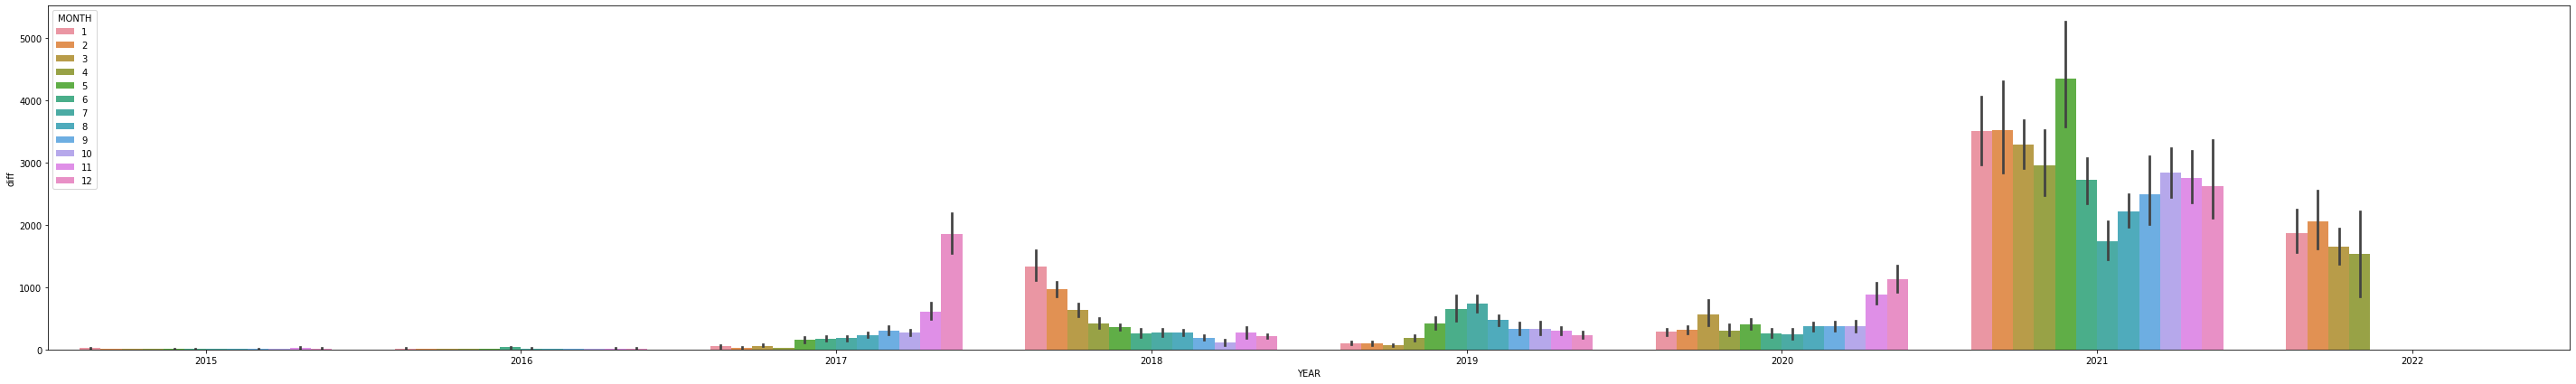

In [ ]:
graphPerMonth(Bitcoin_df, 0, 1, 'diff')

All of the graphs are showing big movements in 2021 and overall correlation with the other graphs.

In [ ]:
from statsmodels.stats.weightstats import ztest as ztest

In [ ]:
def pValueCalculator(dataset, column1, column2):
  data = dataset.copy()
  z_test = ztest( data[ column1 ], data[ column2 ], value=1000 )
  p_value = z_test[1]

  ans = 'The columns ' + column1 + ' and ' + column2 + ' are '

  if p_value > 0.05:
    ans += 'independent'

  else:
    ans += 'dependent'

  return p_value, ans

In [ ]:
p, ans = pValueCalculator(Bitcoin_df, 'Close', 'Open')
print(ans)

The columns Close and Open are dependent


In [ ]:
p2, ans2 = pValueCalculator(Bitcoin_df, 'High', 'Open')
p2, ans2

(0.1443005362557947, 'The columns High and Open are independent')

In [ ]:
p2, ans2 = pValueCalculator(Bitcoin_df, 'Volume', 'Open')
print(ans2)

The columns Volume and Open are dependent


As the p_values show we can be sure

# **Machine Learning**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import tree, metrics, preprocessing, utils
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, classification_report, r2_score
from sklearn.metrics import confusion_matrix, mean_squared_error, mean_absolute_error
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification, load_digits
from sklearn.linear_model import LinearRegression

In [ ]:
Bitcoin_df.head(4)

,Date,Open,High,Low,Close,Adj Close,Volume,YEAR,MONTH,diff
106,2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550,2015,1,6.432007
107,2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650,2015,1,2.273987
108,2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400,2015,1,34.067993
109,2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100,2015,1,29.618011


In [ ]:
copy_df = Bitcoin_df.copy()

del copy_df['Date']
X_train, X_test, y_train, y_test = train_test_split(copy_df, copy_df['Open'], test_size=0.2, random_state=42)

In [ ]:
#Decision Tree Training
model_dt = tree.DecisionTreeRegressor(random_state=42) #Create decision tree classifier object
model_dt.fit(X_train, y_train) #train the classifier using the training data

#Random Forest Training(In new version default of estimators will be 100)
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

#KNeighbor Training
model_knn = KNeighborsRegressor(2)
model_knn.fit(X_train, y_train)

##--- not here but will show after these three ----
#Logistic Regression Training
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y_train)
model_lg = LogisticRegression()
model_lg.fit(X_train, y_transformed)


LogisticRegression()

In [ ]:
#Decision Tree Testing
dt_predictions = model_dt.predict(X_test)
dt_acc = r2_score(y_test, dt_predictions)

#Random Forest Testing
rf_predictions = model_rf.predict(X_test)
rf_acc = r2_score(y_test, rf_predictions)

#K Neighbor Testing
knn_predictions = model_knn.predict(X_test)
knn_acc = r2_score(y_test, knn_predictions)

#Logistic Regression Testing
lg_predictions = model_lg.predict(X_test)
lg_acc = r2_score(y_test, lg_predictions)

print("Decision Tree Accuracy:"+str(dt_acc))
print("Random Forest Accuracy:"+str(rf_acc))
print("K Neighbors Accuracy:"+str(knn_acc))
print("Logistic Regression Accuracy: {:.2f}".format(lg_acc))

mse = mean_squared_error(y_test, rf_predictions)
mae = mean_absolute_error(y_test, rf_predictions)
rmse = np.sqrt(mse)

print("\n")
print("mse: {}".format(mse))
print("mae: {}".format(mae))
print("rmse: {}".format(rmse))

Decision Tree Accuracy:0.9999529952023318
Random Forest Accuracy:0.9999684049061673
K Neighbors Accuracy:0.4475481530031514
Logistic Regression Accuracy: -0.39


mse: 9259.73137081731
mae: 27.798662415062818
rmse: 96.22749799728408




---


> Looking at the accuracy data (also the values are not that great. Something is definitely wrong with the first two. It shouldn't be possible to get almost 100% accuracy) we can use RandomForestRegression for future predictions) 
And obviously we cannot use the logistic regression



# **Machine Learning Visualizations**

Linear Regression

In [ ]:
def r2(y_true, y_pred):
  u = sum((y_true - y_pred)**2)
  v = sum((y_true - y_true.mean())**2)

  return 1-(u/v)

In [ ]:
# extracting the input and output vectors
X = Bitcoin_df[['Close']].values
y = Bitcoin_df['Open'].values

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# intercept
b = model.intercept_
# slope
m = model.coef_

print(m, b, sep="\n")

[0.99833396]
2.1505067918060377


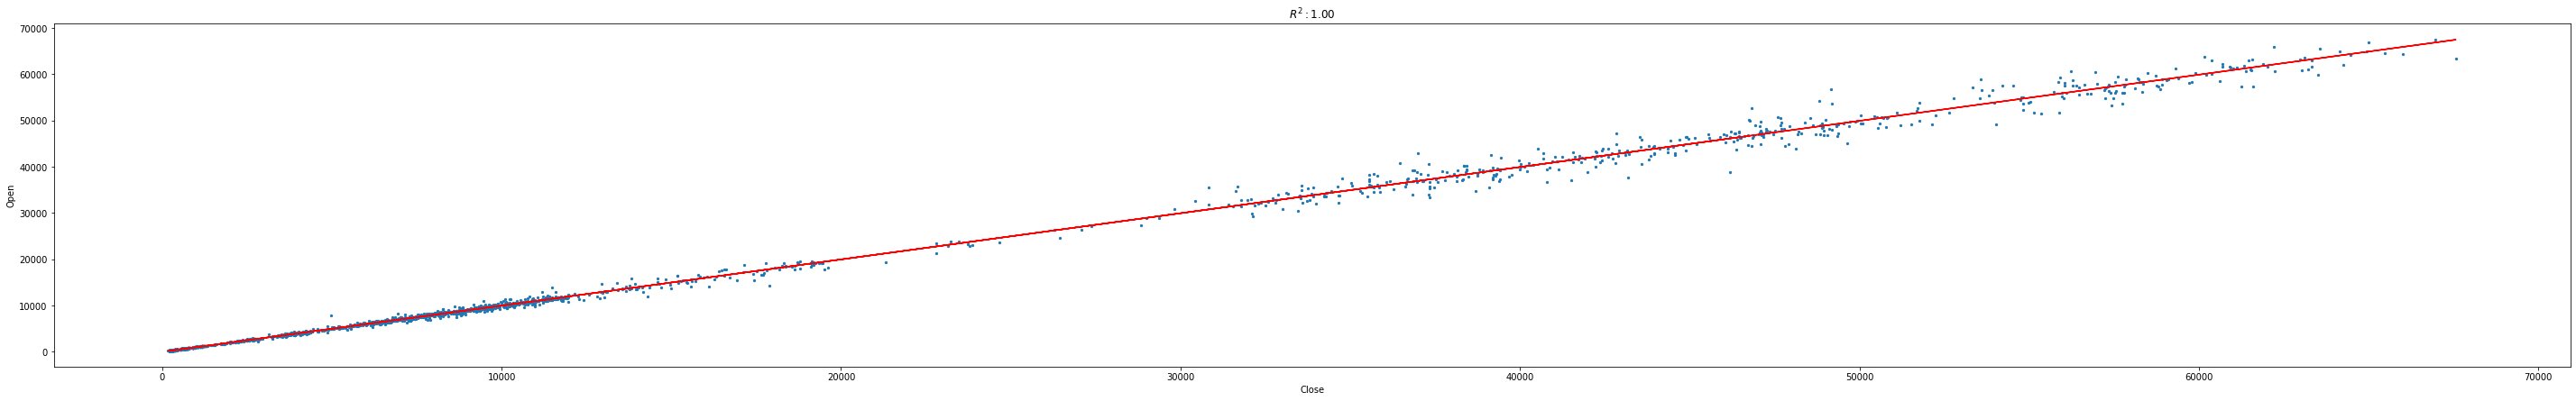

In [ ]:
# resulting regression line
rline = m*X.flatten() + b

Bitcoin_df.plot.scatter(x="Close", y="Open", s=5)
plt.plot(X.flatten(), rline, c="red")
plt.title(r"$R^2: {:.2f}$".format(r2(y, rline)))  
plt.xlabel("Close")  
plt.ylabel("Open")  
plt.show()

Linear Regression found a pretty good looking slope for Open and Close prices

Decision Tree

In [ ]:
#DECISION TREE VISUALIZATION

"""
tree_text_visualize = tree.export_text(model_dt)
fig = plt.figure(figsize=(25,20))
tree_visualize = tree.plot_tree(model_dt, filled=True)
print(tree_visualize)
"""



> Decision Tree visualization is commented out because thegraph for it is really big and it took so much time to run. For our sake of running the entire thing over and over again we commented out but if you want to see you can uncomment and run. It takes about 2-3 minutes



In [ ]:
def train_test_split(df, test_size=0.2):
    split_row = len(df) - int(test_size * len(df))
    train_data = df.iloc[:split_row]
    test_data = df.iloc[split_row:]
    return train_data, test_data

train, test = train_test_split(Bitcoin_df, test_size=0.2)

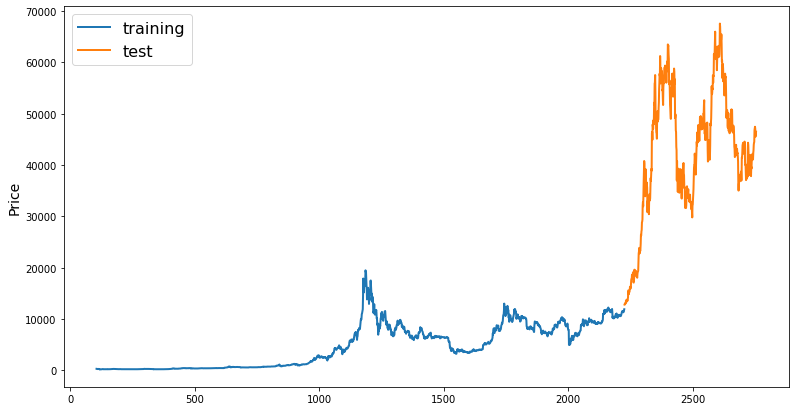

In [ ]:
def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('Price', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16)

line_plot(train['Close'], test['Close'], 'training', 'test', title='')

In [ ]:
def forecast(dataset, column, day):

  data = dataset.copy()
  del data['Date']
  data[ column ] = data[ column ].shift( -day ) 
  data = data[:-day]

  data2 = dataset.copy()
  del data2['Date']
  data_last_day = data2.iloc[-day:]

  rfr = RandomForestRegressor(n_estimators=100, random_state=42)

  train_x = data
  train_y = data[ column ]

  rfr.fit(train_x, train_y)
  pred = model_rf.predict(data_last_day)
  pred = pred[-day:]

  new_data = pd.DataFrame()
  new_data['ACTUAL'] = data_last_day[column]
  new_data['MONTH'] = data_last_day['MONTH']
  new_data['PREDICT'] = pred
  return new_data

In [ ]:
print( forecast(Bitcoin_df, 'Open', 30) )

            ACTUAL  MONTH       PREDICT
2725  42458.140625      3  42415.245586
2726  39148.449219      3  39160.531133
2727  39404.199219      3  39393.876289
2728  38429.304688      3  38412.264883
2729  38059.902344      3  38097.442266
2730  38742.816406      3  38780.690898
2731  41974.070313      3  41861.376641
2732  39439.968750      3  39416.376094
2733  38794.464844      3  38791.392422
2734  38884.726563      3  38874.538243
2735  37846.316406      3  37832.011406
2736  39664.250000      3  39563.009375
2737  39335.570313      3  39338.097657
2738  41140.843750      3  41122.535781
2739  40944.839844      3  40997.048359
2740  41794.648438      3  41754.877266
2741  42191.406250      3  42187.867031
2742  41246.132813      3  41136.450820
2743  41074.105469      3  41093.879844
2744  42364.378906      3  42427.370703
2745  42886.652344      3  42889.913750
2746  43964.546875      3  43983.114336
2747  44349.859375      3  44367.554375
2748  44505.355469      3  44487.790977
